### Approaching Categorical data/variables

* Overview: 

    * Types of Categorical Variables in General
    * Label Encoding and its variant order Label Encoding.
    * Binary Encoding 
    * One Hot Encoding
    * Target Label Ecoding
    * Difference b/w get_dummy and one hot encoding
    * Converting Category To number and binning method also
    * Approaching/Handling NaN in categorical data
    * Advantages as well as disadvantage of each approach

Handling the categorical variable is most critical task, frankly says, There is no single technique which'd be very efficient for every data set/use case, Precisely says it depends on types of the categoroical variable. For E.g whether we have to maintain the relationship between the category or not if it is ordinal variable. Otherwise if it is normal categorical variable then i don't have to look at order b/w them.


* More precisely Nominal(No order b/w categories) 
* ordinal(Some order or relation b/w categories)
* binary category
* cyclic category (days of week/ months in a year)

***Abhishek's Statement(4-GM on kaggle) says that-> "different people treat categorical data based on the type of category. But almost all problem can be approached in same way."***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/akshaysingh/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


* The Dataset is **`cat-in-dat data`** which is categorical encoding challange on kaggle.

In [29]:
df = pd.read_csv('cat_train.csv')
df2 = df.copy()
df.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,...,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,...,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,...,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,...,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0


* In this data set we have all types of category. 

In [3]:
df.shape

(600000, 25)

In [4]:
df.dtypes

id          int64
bin_0     float64
bin_1     float64
bin_2     float64
bin_3      object
bin_4      object
nom_0      object
nom_1      object
nom_2      object
nom_3      object
nom_4      object
nom_5      object
nom_6      object
nom_7      object
nom_8      object
nom_9      object
ord_0     float64
ord_1      object
ord_2      object
ord_3      object
ord_4      object
ord_5      object
day       float64
month     float64
target      int64
dtype: object

In [5]:
#Target variable type(binary)
np.unique(df.target)

array([0, 1])

In [6]:
#check dataset distribution along the target
df.target.value_counts()

0    487677
1    112323
Name: target, dtype: int64

In [7]:
df.columns

Index(['id', 'bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1',
       'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9',
       'ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5', 'day', 'month',
       'target'],
      dtype='object')

In [8]:
#all categories in 'ord-2'
pd.Categorical(df['ord_2'])

[Hot, Warm, Freezing, Lava Hot, Cold, ..., Freezing, Boiling Hot, Freezing, Warm, Boiling Hot]
Length: 600000
Categories (6, object): [Boiling Hot, Cold, Freezing, Hot, Lava Hot, Warm]

In [30]:
#frequency count in each category in col 'ord_2'
df.ord_2.value_counts()

Freezing       142726
Warm           124239
Cold            97822
Boiling Hot     84790
Hot             67508
Lava Hot        64840
Name: ord_2, dtype: int64

**Label Encoding:**
   * Assign each category with a number with assumption it is nominal varaible.
   * If there are N categories we map each category from 0 to N-1.
   * Order Label Encoding (Using dictionary mapping) where we keep relation b/w the categories.
   
        * Where to use : ** Not used in distance based method for e.g Tree based Models we can use it.  
   Not Use :Linear Models, svm,knn where data need to be normalized(or standarized) becoz they are distance based.Because it try to create realtion b/w the categories i.e weight of category.

 * Advantage :  
    
    * couldn't create feature space.(Curse of Dimensionality)

* Diffenece B/w Normalization & standarization:
    * What is Normalization?
        * Normalization is a scaling where we end up our feature with range 0 to 1. It is also known as Min-Max scaling.
          * x' = x - xmin / xmax - xmin.
    * What is Standarization?
         * Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation.
         * x' = x - x(mean) / std(sigma).

In [10]:
#1st Method(Label Encoding)
mapping = {
    'Freezing': 1,
    'Hot': 2,
    'Lava Hot': 3,
    'Warm' : 4,
    'Cold' : 5,
    'Boiling Hot' : 6
 }

df.loc[:, 'ord_2'] = df['ord_2'].map(mapping)
df.ord_2.value_counts()

1.0    142726
4.0    124239
5.0     97822
6.0     84790
2.0     67508
3.0     64840
Name: ord_2, dtype: int64

In [31]:
df.isnull().sum()

id            0
bin_0     17894
bin_1     18003
bin_2     17930
bin_3     18014
bin_4     18047
nom_0     18252
nom_1     18156
nom_2     18035
nom_3     18121
nom_4     18035
nom_5     17778
nom_6     18131
nom_7     18003
nom_8     17755
nom_9     18073
ord_0     18288
ord_1     18041
ord_2     18075
ord_3     17916
ord_4     17930
ord_5     17713
day       17952
month     17988
target        0
dtype: int64

* So here i'm going to treat nan. values as sapertate category like we used in NLP based Models.

In [32]:
df.ord_2.fillna("NONE",inplace = True)

In [33]:
df.ord_2.value_counts()

Freezing       142726
Warm           124239
Cold            97822
Boiling Hot     84790
Hot             67508
Lava Hot        64840
NONE            18075
Name: ord_2, dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder
lbl_enc = LabelEncoder()
df2.ord_2.fillna("NONE",inplace = True)
df2.loc[: , 'ord_2'] = lbl_enc.fit_transform(df2.ord_2.values)
df2.ord_2.value_counts()

2    142726
6    124239
1     97822
0     84790
3     67508
4     64840
5     18075
Name: ord_2, dtype: int64

* We can use this directly in Tree Based Models.

In [15]:
#2nd Approach(binarization)
example = np.array([
    [0,0,1],
    [1,0,0],
    [1,0,1]
])
print(example.nbytes, ": Bytes consued")

72 : Bytes consued


In [16]:
#using sparse matrix (Why called sparse?)
from scipy import sparse
example = np.array([
    [0,0,1],
    [1,0,0],
    [1,0,1]
])  
sparse_example = sparse.csr_matrix(example)

print(sparse_example)
print('--'*20)
print(sparse_example.data.nbytes, ": Bytes Consumed")

  (0, 2)	1
  (1, 0)	1
  (2, 0)	1
  (2, 2)	1
----------------------------------------
32 : Bytes Consumed


* So less from dense array.
* So there are many ways to reperesent sparse array this is most popular one.

In [17]:
#number of bytes consumed
print("Overall Bytes consumed: ", sparse_example.data.nbytes + 
     sparse_example.indptr.nbytes + 
     sparse_example.indices.nbytes)

Overall Bytes consumed:  64


In [18]:
#lets take for more data to see the huge difference
n_rows = 1000
n_cols = 10000

#create random binary matrix with only 5% 1's.
example = np.random.binomial(1, 
                             p=0.05,
                             size=(n_rows, n_cols)  
)
print(f"matrix : {example}")
print(f"dense array size: {example.nbytes}")

sparse_example = sparse.csr_matrix(example)
print(f"size of the sparse array with values only: {sparse_example.data.nbytes}")

full_size = (sparse_example.data.nbytes + 
             sparse_example.indptr.nbytes + 
             sparse_example.indices.nbytes)
print("full size of sparse arrray: {0}".format(full_size))

matrix : [[0 1 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 1 0 0]]
dense array size: 80000000
size of the sparse array with values only: 4005584
full size of sparse arrray: 6012380


* Huge difference we got here. So that's why we prefer sparse array than dense array, and its faster than dense array iff situation is like this.
* More Optimized than sparse

In [19]:
#Lets take for six category i.e r six feature
#3rd Method(One hot Encoding HOW MUCH MEMORY CONSUMED)
example = np.array([
        [0, 0, 0, 0, 1, 0 ],
        [0, 1, 0, 0, 0, 0 ],
        [1, 0, 0, 0, 0, 0 ]
     ]
)
print(f"Bytes Consumed by dense array : {example.nbytes}")

sparse_exm = sparse.csr_matrix(example)

print(f"Bytes Consumed by Sparse array : {sparse_exm.data.nbytes}")

full_size = (sparse_exm.data.nbytes + 
             sparse_exm.indptr.nbytes + 
             sparse_exm.indices.nbytes)

print("full size of sparse arrray: {0}".format(full_size))

Bytes Consumed by dense array : 144
Bytes Consumed by Sparse array : 24
full size of sparse arrray: 52


* One hot Encoding much better than binarization(IN THE SEMSE OF SPARSE), Although One hot Encoding is also not a binnarization method.

In [20]:
#5 rows and one column(column vector)
print(np.random.randint(10, 100, size = 5).reshape(5, 1))

print('=='* 20)

#or more Precisely
print(np.random.randint(10, 100, size = 5).reshape(-1, 1))

[[82]
 [56]
 [62]
 [41]
 [96]]
[[40]
 [52]
 [57]
 [95]
 [68]]


**One Hot Encoding:**
   * In general, Number of columns we w'd end up with N categories to N columns.
   * we create sparse matrix for better performance of the algorithm.(time saving + memory saving also.)
    
   
   **Where to use : Where distance based method used for e.g KNN, SVM we can use it.**
   
   Variants:
       N colmn -> Tree based method to capture all the categories.
       **N - 1 colm -> For Regression Models(linear_models) so one category(col) is by deafault correlated to the columns.(Dummy Variable Trap)**
       
 * DisAdvantage :  
    * Curse of Dimensionality.
    
* `Difference b/w get_dummy and One Hot Encoding`:
   get_dummies method by default drop the one correlated feature and overcome to the double variable trap. 

In [21]:
from sklearn.preprocessing import OneHotEncoder
exmp = np.random.randint(1000, size = 100000)
ohe = OneHotEncoder(sparse = False)
ohe_example= ohe.fit_transform(exmp.reshape(-1, 1))
#print

print(f"Number of bytes Consumed by OHE : {ohe_example.data.nbytes}")

#deault is True
ohe = OneHotEncoder(sparse = True)
ohe_example= ohe.fit_transform(exmp.reshape(-1, 1))

#print
print(f"Number of bytes consumed by OHEnc: {ohe_example.data.nbytes}")

full_Size = (ohe_example.data.nbytes + 
            ohe_example.indices.nbytes + 
            ohe_example.indptr.nbytes)
print(f"number of bytes Consumed y OHEnc by Sparse: {full_Size}")

Number of bytes Consumed by OHE : 800000000
Number of bytes consumed by OHEnc: 800000
number of bytes Consumed y OHEnc by Sparse: 1600004


* Huge Difference we can see here.

In [25]:
#number of categories in ord_2 as well as unique category present in ord_2.
pd.Categorical(df.ord_2)

[2, 4, 1, 3, 5, ..., 1, 6, 1, 4, 6]
Length: 600000
Categories (7, object): [1, 2, 3, 4, 5, 6, NONE]

In [45]:
#4th method
#Converting Category to count(based on their frequency)
df.groupby('ord_2')['id'].transform('count')

#for changing permanently ord_2 categories into numbers.
#df.loc[:, 'ord_2'] = df.groupby('ord_2')['id'].transform('count')

0          67508.0
1         124239.0
2         142726.0
3          64840.0
4          97822.0
            ...   
599995    142726.0
599996     84790.0
599997    142726.0
599998    124239.0
599999     84790.0
Name: id, Length: 600000, dtype: float64

In [48]:
pd.Categorical(df.ord_1)

[Contributor, Grandmaster, NaN, Novice, Grandmaster, ..., Novice, Novice, Contributor, Master, Contributor]
Length: 600000
Categories (5, object): [Contributor, Expert, Grandmaster, Master, Novice]

In [52]:
df.groupby([
     'ord_1',
     'ord_2'
])['id'].count().reset_index(name = "Count_categories")

,ord_1,ord_2,Count_categories
0,Contributor,Boiling Hot,15634
1,Contributor,Cold,17734
2,Contributor,Freezing,26082
3,Contributor,Hot,12428
4,Contributor,Lava Hot,11919
5,Contributor,Warm,22774
6,Expert,Boiling Hot,19477
7,Expert,Cold,22956
8,Expert,Freezing,33249
9,Expert,Hot,15792


* ONE more trick to create a categoricals feature by combining them using domain knowledge/using some common sense and then apply encoding technique on top that.

In [54]:
df.loc[: , 'new_feature'] = df.ord_2.astype(str) + "_" + df.ord_1.astype(str)
df.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target,new_feature
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,...,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0,Hot_Contributor
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,...,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0,Warm_Grandmaster
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,...,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0,Freezing_nan
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,...,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0,Lava Hot_Novice
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,...,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0,Cold_Grandmaster


* Note that NaN also combined with this. How Treatment has been done with NaN values But no worries treatment of NaN has been done in same way. 

In [56]:
pd.Categorical(df.ord_3)

[c, e, n, a, h, ..., a, n, n, m, b]
Length: 600000
Categories (15, object): [a, b, c, d, ..., l, m, n, o]

In [59]:
df['new_feature2'] = (df.ord_1.astype(str) + '_' + 
                      df.ord_2.astype(str) + '_' + 
                      df.ord_3.astype(str)
                )
df.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target,new_feature,new_feature2
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,...,Contributor,Hot,c,U,Pw,6.0,3.0,0,Hot_Contributor,Contributor_Hot_c
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,...,Grandmaster,Warm,e,X,pE,7.0,7.0,0,Warm_Grandmaster,Grandmaster_Warm_e
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,...,NaN,Freezing,n,P,eN,5.0,9.0,0,Freezing_nan,nan_Freezing_n
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,...,Novice,Lava Hot,a,C,NaN,3.0,3.0,0,Lava Hot_Novice,Novice_Lava Hot_a
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,...,Grandmaster,Cold,h,C,OZ,5.0,12.0,0,Cold_Grandmaster,Grandmaster_Cold_h


## Handling NaN Category by different-2 way.

* Drop them if we have significant data or less number of categories.(High chances of loss of information)
* Using Mode or frequency(High chances of model becomne biased)
* Model based imputraion predicting categories.(preferable tress method)
* Treating nan as new/unknown/rare category.
* ignore if that feature already not important for our objective/Target.(more focused one)

ALL other methods are straight forward, we focus more on unknown method.

In [62]:
#read the data one more time
df2.ord_2.value_counts()

Freezing       142726
Warm           124239
Cold            97822
Boiling Hot     84790
Hot             67508
Lava Hot        64840
Name: ord_2, dtype: int64

In [64]:
df2.ord_2.fillna("None").value_counts()

Freezing       142726
Warm           124239
Cold            97822
Boiling Hot     84790
Hot             67508
Lava Hot        64840
None            18075
Name: ord_2, dtype: int64

* Almost 18000 values are NULL.
* Rare Category Concept

In [9]:
df.ord_2.fillna('NONE').value_counts()

Freezing       142726
Warm           124239
Cold            97822
Boiling Hot     84790
Hot             67508
Lava Hot        64840
NONE            18075
Name: ord_2, dtype: int64

* In Test set we also have null and and train we also have null Now these null can be traeted as saperated category in training data and can be easily understand by the model in live data process treating unknown category as rare one.(do refinement on this statement)

In [17]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

#train set
train = pd.read_csv('cat_train.csv')

#testing data
test = pd.read_csv('cat_test.csv')

#create target variable in test set(trick one two separate test and train after handling NaN)
test.loc[: , 'target'] = -1

#concatinating the train and test set
full_data = pd.concat([train, test]).reset_index(drop = True)

#get features except id and target 
features = [f for f in full_data.columns if f not in ['target', 'id']]

#loop over the featurte list
for feature in features:
    
    #before apply label encoder first handle the missing value
    temp_col = full_data[feature].fillna('NONE').astype(str).values
    lbl_enc = LabelEncoder()
    full_data.loc[ : , feature] = lbl_enc.fit_transform(temp_col)

#now split train and test based on target so that test data exclusive towards 
#my train data no data leakage issue

train = full_data[full_data.target != 1].reset_index(drop=True) 
test = full_data[full_data.target == 1].reset_index(drop =True)

* One more thing if we have data like below- 
* Now we can treat J, L as Rare category becoz they are very less as compared to other. We can also include somewhat V and G also.

In [19]:
df.ord_4.value_counts()

N    39978
P    37890
Y    36657
A    36633
R    33045
U    32897
M    32504
X    32347
C    32112
H    31189
Q    30145
T    29723
O    25610
B    25212
E    21871
K    21676
I    19805
D    17284
F    16721
W     8268
Z     5790
S     4595
G     3404
V     3107
J     1950
L     1657
Name: ord_4, dtype: int64

In [1]:
#covert NaN as NONE 
df.ord_4.fillna('NONE', inplace = True)

NameError: name 'df' is not defined

In [54]:
df.loc[df.ord_4.value_counts()[df.ord_4].values < 2000, 'ord_4'] = 'RARE'
df.ord_4.value_counts()
#we can also do by using J and L vategoty and convert them as "RARE".
#df.loc[np.where((df2.ord_4 == 'J') | (df.ord_4 == 'L')), "ord_4"]  = 'RARE'(chained warning may be generated).

N       39978
P       37890
Y       36657
A       36633
R       33045
U       32897
M       32504
X       32347
C       32112
H       31189
Q       30145
T       29723
O       25610
B       25212
E       21871
K       21676
I       19805
NONE    17930
D       17284
F       16721
W        8268
Z        5790
S        4595
RARE     3607
G        3404
V        3107
Name: ord_4, dtype: int64

* Now this is super duper approach to handle categorical data in live settings and model performance would be very high.

### Let's try to build Model 

* Since my data has imbalaced/skewed Target then i have to apply stratified k_fold CV. So the ratio of data set should be change in each fold.

In [8]:
from sklearn.model_selection import StratifiedKFold

#read the csv data
df = pd.read_csv('cat_train.csv')

#create on more column with name as k_fold
df['k_fold'] = -1

#get target
Y = df.target.values

#data rndomization
df = df.sample(frac = 1).reset_index(drop = True)


#create object of kfold
kf = StratifiedKFold(n_splits= 5)


#fill the k_fold column
#fold_no varies from 0 to 4 
#becoz we initailize olds with only 5 folds 
for fold_no, (t_, i_) in enumerate(kf.split(X = df, y = Y)):
    df.loc[i_, 'k_fold'] = fold_no

    
#save the new csv with k_fold column
df.to_csv('cat_train_folds.csv', index = False)

In [13]:
df_fold = pd.read_csv('cat_train_folds.csv')
print(df_fold.k_fold.head())
df_fold.k_fold.value_counts()

0    0
1    0
2    0
3    0
4    0
Name: k_fold, dtype: int64


4    120000
3    120000
2    120000
1    120000
0    120000
Name: k_fold, dtype: int64

* So here we equally devided our data in Four Folds. 
* Now lets check the data distribution w.r.t classes we have before kfolds and after k_folds

### Understanding StratifiedKFold Cross Validation code wise

In [10]:
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [2, 3], [7, 9], [9, 2], [3, 4], [1, 9], [5, 6]])
y = np.array([0, 0, 1, 1, 0, 1 ,0 ,1, 0, 1])

from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits = 4)
for folds_ , (train_index, test_index) in enumerate(skf.split(X, y)):
    print(f"{folds_} -> {train_index}, {test_index}")

0 -> [3 4 5 6 7 8 9], [0 1 2]
1 -> [0 1 2 6 7 8 9], [3 4 5]
2 -> [0 1 2 3 4 5 8 9], [6 7]
3 -> [0 1 2 3 4 5 6 7], [8 9]


In [ ]:
* Test_indices are 

In [17]:
#so we have almost 4:1 ratio before CV.
df.target.value_counts()[0] / df.target.value_counts()[1]

4.3417376672631605

In [19]:
Fold_1 = df[df_fold.k_fold == 0].target.value_counts()
print(f"Fold_1: {Fold_1[0]/Fold_1[1]}")

Fold_2 = df[df_fold.k_fold == 1].target.value_counts()
print(f"Fold_2: {Fold_2[0]/Fold_2[1]}")

Fold_3 = df[df_fold.k_fold == 2].target.value_counts()
print(f"Fold_3: {Fold_3[0]/Fold_3[1]}")

Fold_4 = df[df_fold.k_fold == 3].target.value_counts()
print(f"Fold_4: {Fold_4[0]/Fold_4[1]}")

Fold_5 = df[df_fold.k_fold == 4].target.value_counts()
print(f"Fold_5: {Fold_5[0]/Fold_5[1]}")

Fold_1: 4.310204442871051
Fold_2: 4.312320155828058
Fold_3: 4.355469272995046
Fold_4: 4.375862377923125
Fold_5: 4.355469272995046


In [20]:
#alternative using the group by
df_fold.groupby('k_fold')['target'].value_counts()

k_fold  target
0       0         97402
        1         22598
1       0         97411
        1         22589
2       0         97593
        1         22407
3       0         97678
        1         22322
4       0         97593
        1         22407
Name: target, dtype: int64

* Almost equivalant ratio in each fold as well as target distribution before folding

### Building our First Model After K-fold

In [33]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

def run_model(fold):
    #get data
    df = pd.read_csv('cat_train_folds.csv')
    
    #get features
    features = [f for f in df.columns if f not in ['target', 'id', 'k_fold']]
    
    #Handle the missing value
    #its not neded becoz all are categories.
    #but for making without any mistake it can treat numeric category features such as
    #rating and movie  score also as same way.
    for feature in features:
        df.loc[: , feature] = df[feature].astype(str).fillna('NONE')

    #Split train and validation set(consist all features)
    df_valid = df[df.k_fold == fold]
    df_train = df[df.k_fold != fold]
    
    #cocatenate above dataset(It is equivalant to above but it have relevant fetures)
    full_data = pd.concat([df_train[features], df_valid[features]])
    
    #Apply Encoding towrads category on entire data(Live setting for rare)
    ohe = OneHotEncoder()
    
    #Fitting Encoding on entire data(Taker care of RARE category)
    ohe.fit(full_data[features])
    
    #training data
    x_train = ohe.transform(df_train[features])
    
    #validation data
    x_valid = ohe.transform(df_valid[features])

    #now start building model
    lr = LogisticRegression()
    
    #fit my data
    lr.fit(x_train, df_train.target.values)
    
    #predict my data
    valid_predict = lr.predict_proba(x_valid)[:, 1]
    
    #check the roc_auc
    auc = roc_auc_score(df_valid.target.values, valid_predict)
    
    print(f"ROC_AUC with Fold_{fold} : {auc}")

if __name__== "__main__":
    for fold_ in range(5):
        run_model(fold_)

/Users/akshaysingh/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


ROC_AUC with Fold_0 : 0.7867284701922801


* Warning is important look at it why it is so?
* We haven't play with hyperparameter 
* Lets apply this on all folds

### Building our 2nd Model After K-fold

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.metrics import  roc_auc_score

def run_model_rf(fold):
     
        df = pd.read_csv('cat_train_folds.csv')
        
        #select appropriate features
        features = [f for f in df.columns if f not in ['target', 'id', 'k_fold']]
        
        #convert all  data into string
        #handling missing using unknown category
        for feature in features:
            df.loc[: , feature] = df[feature].astype(str).fillna('NONE')
            
        #Encoding for each feature
        for col in features:
            lbl = LabelEncoder()
            lbl.fit(df[col])
            df.loc[: , col] = lbl.transform(df[col])
            
        #splitting data into train and validation
        df_valid = df[df.k_fold == fold]
        df_train = df[df.k_fold != fold]
        
        #traing the algo
        rf = RandomForestClassifier()
        rf.fit(df_train[features].values, df_train.target.values)
        
        #prediction
        valid_pred = rf.predict_proba(df_valid[features].values)[:, 1]
        
        #get score
        auc = roc_auc_score(df_valid.target.values, valid_pred)
        
        print(f"Fold {fold} Auc_score is: {auc}")

if __name__ == "__main__":
    for fold_ in range(5):
        run_model_rf(fold_)
        

Fold 0 Auc_score is: 0.717353070718682
Fold 1 Auc_score is: 0.7152479868567682
Fold 2 Auc_score is: 0.7162863777301647
Fold 3 Auc_score is: 0.7178895267436091
Fold 4 Auc_score is: 0.713762869218395


* It's looks worse than simple logistic Regression.(without doing any tuning of hyperparameter)
* And this is why we always start with simplest model.

* folds taking to much time in training as well So not only score but also Training cost is too high and also taking larger space to store trees.

* we can also apply random forest using sparse OneHotEncoded data. But that is also take a lot of time. We can also try reducing the sparse one hot encoded data metrices using singular value decomposition(TruncatedSVD) -> ***This method use a lot in NLP to get topics.***   

### Building our 3rd Model After K-fold

* Since it's a tree based algorithm we have to used label encoded data.

In [14]:
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score

def run_model_XGB(fold):
    df = pd.read_csv('cat_train_folds.csv')
    
    #get features
    features = [f for f in df.columns if f not in ['target', 'k_fold', 'id']]
    
    #handling missing values
    for feature in features:
        df.loc[:, feature] = df[feature].astype(str).fillna('NONE')
        
    #apply Label Encoder
    for feature in features:
        lbl = LabelEncoder()
        lbl.fit(df[feature])
        df.loc[:, feature] = lbl.transform(df[feature])
        
    #train and validation split
    df_valid = df[df.k_fold == fold]
    df_train = df[df.k_fold != fold]
    
    #training my model
    model = xgb.XGBClassifier(max_depth = 4, 
                              n_estimators = 100
            )
    model.fit(df_train[features].values, df_train.target.values)
    
    #testing phase
    valid_pred = model.predict_proba(df_valid[features].values)[:, 1]
    auc = roc_auc_score(df_valid.target.values, valid_pred)
    
    print(f"fold = {fold} , AUC_score = {auc}")    
    
if __name__ == "__main__":
    for fold_ in range(5):
        run_model_XGB(fold_)

fold = 0 , AUC_score = 0.7516287463733953
fold = 1 , AUC_score = 0.7489627997020287
fold = 2 , AUC_score = 0.7504584690767451
fold = 3 , AUC_score = 0.7514120013473906
fold = 4 , AUC_score = 0.747496466301717


* In this we have good score than random Forest.
* If we apply hyperParameter Optimization We can improve much more thing. 
* we can also improove above model Just doing some EDA to see data pattern and getting some insights about data and feature selection may also improve the accuracy of model.

### Model - 2 Building 2nd Model

In [36]:
df = pd.read_csv('adult.csv')
df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


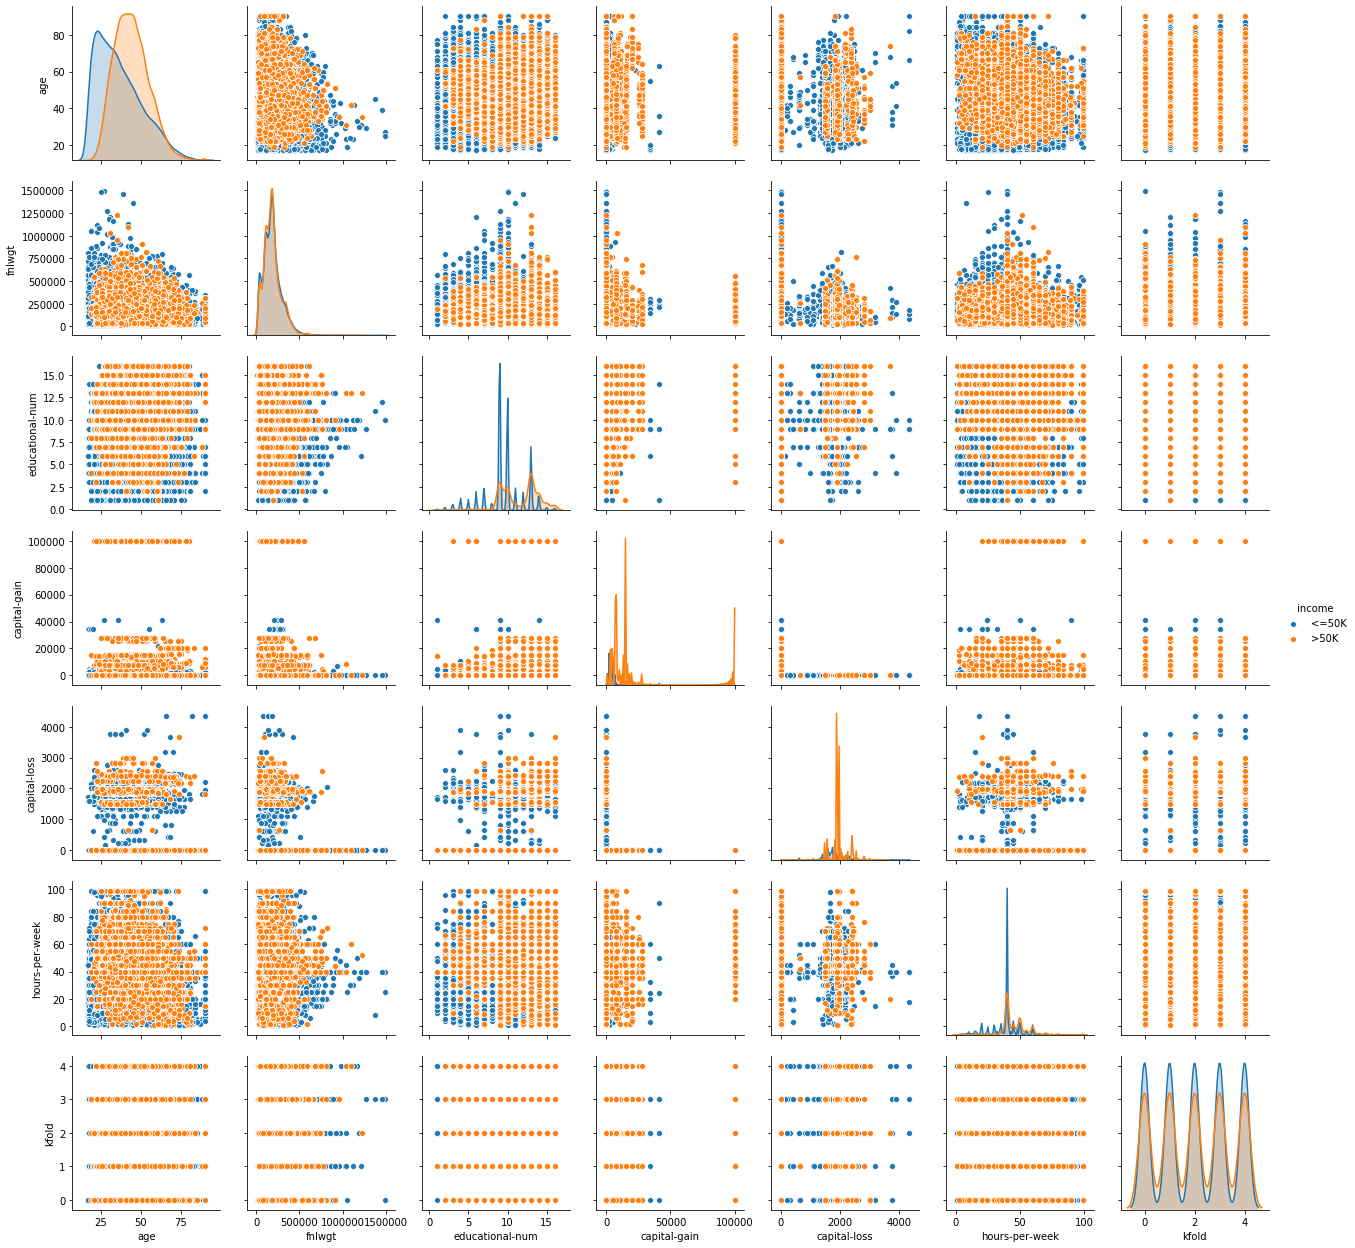

In [63]:
sns.pairplot(df, hue = 'income')

* However null values are present with '?' in this dataset

In [37]:
#get the missing value count
for col in df.columns:
    print(f"{col} : {len(np.where(df[col] == '?')[0])}")

age : 0
workclass : 2799
fnlwgt : 0
education : 0
educational-num : 0
marital-status : 0
occupation : 2809
relationship : 0
race : 0
gender : 0
capital-gain : 0
capital-loss : 0
hours-per-week : 0
native-country : 857
income : 0


/Users/akshaysingh/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [39]:
#copy versues view issue or chained index warning in pandas 
#where assignment will not work and we have to use "mask" i.e. -> df['workclass']=='?' rather than assignment
#df[np.where(df['workclass'] == '?')]['workclass'] = 'NONE'
df.loc[df['workclass'] == '?', 'workclass'] = "NONE"
df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NONE,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [40]:
#get all feature which are object type
df.dtypes[df.dtypes == 'object']

workclass         object
education         object
marital-status    object
occupation        object
relationship      object
race              object
gender            object
native-country    object
income            object
dtype: object

In [41]:
#get numeric features
df.dtypes[df.dtypes == 'int64'].index.to_list()

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [42]:
df.income.value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [43]:
print(11687/( 37155+11687))

0.23928176569346055


>=>50k class have 24% ALL OF THE ENTIRE DATA AND 76% WHICH IS <= 50K is mojority So data set again imbalanced.

In [44]:
df.shape

(48842, 15)

* Create fold like previouse case.

In [45]:
from sklearn.model_selection import StratifiedKFold 
skf = StratifiedKFold(n_splits = 5) 

#create fold column
df['kfold'] = -1

#creating the folds
for f_, (t_,i_) in enumerate(skf.split(X = df, y = df.income.values)):
    df.loc[i_, 'kfold'] = f_
    
#save the csv file
df.to_csv('adults_folds.csv', index = False)

In [46]:
#check all folds equally devided or not towards the target
df.groupby('kfold')['income'].value_counts()

kfold  income
0      <=50K     7431
       >50K      2338
1      <=50K     7431
       >50K      2338
2      <=50K     7431
       >50K      2337
3      <=50K     7431
       >50K      2337
4      <=50K     7431
       >50K      2337
Name: income, dtype: int64

* Try to build the Model using one hot encoder with simple logistic Regression.

In [50]:
#get all dependencies
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

#create function
def run_model_LR(fold):
    df = pd.read_csv('adults_folds.csv')
    
    #get numerics feature and drop it
    numerical = [
        'age',
        'fnlwgt',
        'educational-num',
        'capital-gain',
        'capital-loss',
        'hours-per-week'
    ]
    df = df.drop(numerical, axis = 1)
    
    #Mapping the target
    target_mapping={
        '<=50K': 0,
        '>50K': 1
    }
    
    #replace target
    df.loc[:, 'income'] = df['income'].map(target_mapping)
    
    #get valid categorical features
    features = [
            feature for feature in df.columns if feature not in ['income', 'kfold']
    ]
    
    #Handle missing value if any(Doubt in '?')
    for feat in features:
        df.loc[df[feat] == '?' , feat] = 'NONE'
    
    #get train and validation set
    df_train = df[df.kfold != fold].reset_index(drop = True)
    df_valid = df[df.kfold == fold].reset_index(drop = True)
    
    #Apply ONE HOT ENCODER
    ohe = OneHotEncoder()
    
full_data = pd.concat([df_train[features], df_valid[features]],
                          axis = 0)
    
    #fit my algorithm
    ohe.fit(full_data[features])
    
    #transformed tarining data
    x_train = ohe.transform(df_train[features])
    
    #transformed my validation data
    x_valid = ohe.transform(df_valid[features])
    
    #build the simple LR classifier(Without tuning)
    model = LogisticRegression()
    
    model.fit(x_train, df.income.values)
    
    valid_predict = model.predict_proba(x_valid)[:, 1]
    
    #get score_
    auc_score = roc_auc_score(df.valid.income.values, valid_predict) 
                
    print(f"Fold = {fold}, with ROC_AUC {auc_score}")
    
if __name__== "__main__":
    for fold_ in range(5):
        print(run_model_LR(fold_))

/Users/akshaysingh/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fold = 0, with ROC_AUC 0.8798800403691147
None


/Users/akshaysingh/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fold = 1, with ROC_AUC 0.8785595082399938
None


/Users/akshaysingh/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fold = 2, with ROC_AUC 0.8731868779708132
None


/Users/akshaysingh/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fold = 3, with ROC_AUC 0.8789306060198269
None
Fold = 4, with ROC_AUC 0.8833881897453145
None


/Users/akshaysingh/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


* Convergence warning becoz we are not doing any kind of hyperparamter tuning.

 ### Build Model Including Numerical Features

In [57]:
#get all dependencies
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import roc_auc_score

#create function
def run_model_LR(fold):
    df = pd.read_csv('adults_folds.csv')
    
    #get numerics feature and drop it
    numerical = [
        'age',
        'fnlwgt',
        'educational-num',
        'capital-gain',
        'capital-loss',
        'hours-per-week'
    ]
    df = df.drop(numerical, axis = 1)
    
    #Mapping the target
    target_mapping={
        '<=50K': 0,
        '>50K': 1
    }
    
    #replace target
    df.loc[:, 'income'] = df['income'].map(target_mapping)
    
    #get valid categorical features
    features = [
            feature for feature in df.columns if feature not in ['income', 'kfold']
    ]
    
    #Handle missing value if any(Doubt in '?')
    for feat in features:
        df.loc[df[feat] == '?' , feat] = 'NONE'
        
    #Apply LABEL ENCODER
    for feature in features:
        lbl = LabelEncoder()
        lbl.fit(df[feature])
        df.loc[: , feature]= lbl.transform(df[feature])  
        
    #get train and validation set
    df_train = df[df.kfold != fold].reset_index(drop = True)
    df_valid = df[df.kfold == fold].reset_index(drop = True)
    
    
    #modelling
    model = xgb.XGBClassifier(max_depth = 4,
                            n_estimators=100
            )
    
    model.fit(df_train[features].values, df_train.income.values)
    
    valid_predict = model.predict_proba(df_valid[features].values)[:, 1]
    
    #get score_
    auc_score = roc_auc_score(df_valid.income.values, valid_predict) 
                
    print(f"Fold = {fold}, with ROC_AUC {auc_score}")
    
if __name__== "__main__":
    for fold_ in range(5):
        print(run_model_LR(fold_))

Fold = 0, with ROC_AUC 0.8799825517659531
None
Fold = 1, with ROC_AUC 0.8793659293098445
None
Fold = 2, with ROC_AUC 0.8739433741786582
None
Fold = 3, with ROC_AUC 0.879012028332892
None
Fold = 4, with ROC_AUC 0.8821946964131052
None


* We don't get much more good score it almost same as above logistic model.

### Let's try to Build model  including numeric feature also.

In [62]:
#get all dependencies
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import roc_auc_score

#create function
def run_model_LR(fold):
    df = pd.read_csv('adults_folds.csv')
    
    #get numerics feature and drop it
    numerical_cols = [
        'age',
        'fnlwgt',
        'educational-num',
        'capital-gain',
        'capital-loss',
        'hours-per-week'
    ]
    
    #Mapping the target
    target_mapping={
        '<=50K': 0,
        '>50K': 1
    }
    
    #replace target
    df.loc[:, 'income'] = df['income'].map(target_mapping)
    
    #get valid categorical features
    features = [
            feature for feature in df.columns if feature not in ['income', 'kfold']
    ]
    
    #Handle missing value if any(No null values in numeric features)
    for feat in features:
        df.loc[df[feat] == '?' , feat] = 'NONE'
        
    #Apply LABEL ENCODER
    for feature in features:
        if feature not in numerical_cols:
            lbl = LabelEncoder()
            lbl.fit(df[feature])
            df.loc[: , feature]= lbl.transform(df[feature])  
        
    #get train and validation set
    df_train = df[df.kfold != fold].reset_index(drop = True)
    df_valid = df[df.kfold == fold].reset_index(drop = True)
    
    
    #modelling(Without hyper parameter optimization)
    model = xgb.XGBClassifier(max_depth = 4,
                            n_estimators=100
            )
    
    model.fit(df_train[features].values, df_train.income.values)
    
    valid_predict = model.predict_proba(df_valid[features].values)[:, 1]
    
    #get score_
    auc_score = roc_auc_score(df_valid.income.values, valid_predict) 
                
    print(f"Fold = {fold}, with ROC_AUC {auc_score}")
    
if __name__== "__main__":
    for fold_ in range(5):
        print(run_model_LR(fold_))

Fold = 0, with ROC_AUC 0.9256568758785562
None


/Users/akshaysingh/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Fold = 1, with ROC_AUC 0.9232666220704677
None


/Users/akshaysingh/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Fold = 2, with ROC_AUC 0.9216466286584545
None


/Users/akshaysingh/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Fold = 3, with ROC_AUC 0.927326583573296
None


/Users/akshaysingh/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Fold = 4, with ROC_AUC 0.9279865131481775
None


* Finally we got high ROC-Score which is quite good without hyperparameter optimization.
* We can also do some feature selection.

* NOTE:
    * Out of the box thing we can do here by concatinating the categorical features and then applying some feature selection approach on top of that. 
    * This method is kind of greedy and brute force if we don't have too many features.

In [64]:
#let's try to increase some cost to our model and check it works for me or not.
#get all dependencies
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import roc_auc_score

#create function
def run_model_LR(fold):
    df = pd.read_csv('adults_folds.csv')
    
    #get numerics feature and drop it
    numerical_cols = [
        'age',
        'fnlwgt',
        'educational-num',
        'capital-gain',
        'capital-loss',
        'hours-per-week'
    ]
    
    #Mapping the target
    target_mapping={
        '<=50K': 0,
        '>50K': 1
    }
    
    #replace target
    df.loc[:, 'income'] = df['income'].map(target_mapping)
    
    #get valid categorical features
    features = [
            feature for feature in df.columns if feature not in ['income', 'kfold']
    ]
    
    #Handle missing value if any(No null values in numeric features)
    for feat in features:
        df.loc[df[feat] == '?' , feat] = 'NONE'
        
    #Apply LABEL ENCODER
    for feature in features:
        if feature not in numerical_cols:
            lbl = LabelEncoder()
            lbl.fit(df[feature])
            df.loc[: , feature]= lbl.transform(df[feature])  
        
    #get train and validation set
    df_train = df[df.kfold != fold].reset_index(drop = True)
    df_valid = df[df.kfold == fold].reset_index(drop = True)
    
    
    #modelling(Without hyper parameter optimization)
    model = xgb.XGBClassifier(max_depth = 8,
                            n_estimators=200
            )
    
    model.fit(df_train[features].values, df_train.income.values)
    
    valid_predict = model.predict_proba(df_valid[features].values)[:, 1]
    
    #get score_
    auc_score = roc_auc_score(df_valid.income.values, valid_predict) 
                
    print(f"Fold = {fold}, with ROC_AUC {auc_score}")
    
if __name__== "__main__":
    for fold_ in range(5):
        print(run_model_LR(fold_))

/Users/akshaysingh/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Fold = 0, with ROC_AUC 0.928936060631491
None


/Users/akshaysingh/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Fold = 1, with ROC_AUC 0.9263067958321779
None


/Users/akshaysingh/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Fold = 2, with ROC_AUC 0.926789449672114
None


/Users/akshaysingh/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Fold = 3, with ROC_AUC 0.9297966624567762
None


/Users/akshaysingh/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Fold = 4, with ROC_AUC 0.9317812593590312
None


* again we have increase our score. At least for kaggle comptetion .92 to .93 matter a lot.
* But for production wise it's not that much hike. 
* we can also try **Target Encoding** on this and it can increase our score much more but skip it for now.

In [1]:
#flow->
"""
1.get data
2.drop numeric col
3.change target
4.get features
5.handle missing data
6.Apply Encoded method
7.Build Model
8.Test Model
"""

'\n1.get data\n2.drop numeric col\n3.change target\n4.get features\n5.handle missing data\n6.Apply Encoded method\n7.Build Model\n8.Test Model\n'

### Target Encoding

* Target Encoding is a technique in which we have to map each category in a given feature to its mean target.
* In target mean encoding we are assigning target mean to the each category.
**NOTE:**
    * Target Encoding is more prone to overfitting.
    * Target Encoding always be done using CV.
    * Smoothning parameter needed to avoid.

In [ ]:
from sklearn.preprocessing import LabelEncoder
numeric_cols = [
        'age',
        'fnlwgt',
        'educational-num',
        'capital-gain',
        'capital-loss',
        'hours-per-week'  
]

for col in df.columns:
    if col not in numeric_cols:
        lbl = LabelEncoder()
        df.loc[:, col] = lbl.fit_transform(df[col])
        

for feature in df.columns
        mapping_dict = {
        df.groupby()
}       

In [3]:
df = pd.read_csv('adults_folds.csv')
mapping_target = {
    '<=50K': 0,
    '>50K' : 1
}
df.loc[:, 'income'] = df.income.map(mapping_target)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,kfold
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1,0
4,18,NONE,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0,0


* Below is the way how to do Target encoding.

In [5]:
df.groupby('race')['income'].count()

race
Amer-Indian-Eskimo      470
Asian-Pac-Islander     1519
Black                  4685
Other                   406
White                 41762
Name: income, dtype: int64

In [35]:
dict(df.groupby('race')['income'].())

{'Amer-Indian-Eskimo': 0.11702127659574468,
 'Asian-Pac-Islander': 0.26925608953258723,
 'Black': 0.1208110992529349,
 'Other': 0.12315270935960591,
 'White': 0.2539868780230832}

In [36]:
#this is how we have to assign the value to each category by loop through.
df.race.map(dict(df.groupby('race')['income'].mean()))

0        0.120811
1        0.253987
2        0.253987
3        0.120811
4        0.253987
           ...   
48837    0.253987
48838    0.253987
48839    0.253987
48840    0.253987
48841    0.253987
Name: race, Length: 48842, dtype: float64